In [176]:
import pandas as pd

In [177]:
df = pd.read_csv("Project_Data.csv")
df

,_id,square_name,connected_square,road connected,Camera,Day,ev_count,non_ev_count
0,63c29d6060df247b6f8950b0,ashok,"[""prerna"",""medical"",""trillium""]",prerna,1,Mon,3,7
1,63c29d6060df247b6f8950b0,ashok,"[""prerna"",""medical"",""trillium""]",prerna,1,Tue,5,5
2,63c29d6060df247b6f8950b0,ashok,"[""prerna"",""medical"",""trillium""]",prerna,1,Wed,4,6
3,63c29d6060df247b6f8950b0,ashok,"[""prerna"",""medical"",""trillium""]",prerna,1,Thu,4,6
4,63c29d6060df247b6f8950b0,ashok,"[""prerna"",""medical"",""trillium""]",prerna,1,Fri,4,6
...,...,...,...,...,...,...,...,...
219,63c402328dc817a12da33b62,medical,"[""ashok"",""trillium"",""ajni"",""prerna""]",ajni,4,Wed,5,7
220,63c402328dc817a12da33b62,medical,"[""ashok"",""trillium"",""ajni"",""prerna""]",ajni,4,Thu,5,7
221,63c402328dc817a12da33b62,medical,"[""ashok"",""trillium"",""ajni"",""prerna""]",ajni,4,Fri,6,5
222,63c402328dc817a12da33b62,medical,"[""ashok"",""trillium"",""ajni"",""prerna""]",ajni,4,Sat,5,7


In [178]:
sub_df = df.loc[:, ['square_name','Camera', 'road connected', 'ev_count']]
sub_df

,square_name,Camera,road connected,ev_count
0,ashok,1,prerna,3
1,ashok,1,prerna,5
2,ashok,1,prerna,4
3,ashok,1,prerna,4
4,ashok,1,prerna,4
...,...,...,...,...
219,medical,4,ajni,5
220,medical,4,ajni,5
221,medical,4,ajni,6
222,medical,4,ajni,5


In [179]:
# Here I am tring to make dictionary
keys = []

#  this loop will iterate over all square_name column of data frame and store the keys in keys array for outer loop
for squarName in sub_df['square_name']:
    if squarName not in keys:
        keys.append(squarName)

Outer_dict = {}

for squarName in sub_df['square_name']:
    # print(sub_df['square_name'])
    if squarName not in Outer_dict.keys():
        Outer_dict[squarName] = {}

# Outer_dict

# getting the sub set of sub set df 
for square in Outer_dict.items():
    # square will get tuple 
    # now we will try to get sub set of set set
    sub_square = sub_df[sub_df['square_name'] == square[0]]
    # print(sub_square['Camera'])
    # print(sub_square)

    inner_dict = {}
    for cam in sub_square['Camera']:
        # key for inner dictionary
        key = f'camera_{cam}'
        if key not in inner_dict.keys():
            inner_dict[key] = 0
        else:
            sub_df_camera = sub_square.loc[ (sub_square['Camera'] == cam) & (sub_square['square_name'] == square[0] ) ]
            # print(sub_df_camera)
            inner_dict[key] += sub_df_camera['ev_count'].sum()

    Outer_dict[square[0]] = inner_dict

print(Outer_dict)

{'ashok': {'camera_1': 819, 'camera_2': 858, 'camera_3': 741}, 'trillium': {'camera_1': 897, 'camera_2': 962, 'camera_3': 871}, 'ajni': {'camera_1': 858, 'camera_2': 988, 'camera_3': 936}, 'prerna': {'camera_1': 806, 'camera_2': 910, 'camera_3': 910}, 'medical': {'camera_1': 819, 'camera_2': 949, 'camera_3': 936, 'camera_4': 975}}


[819, 858, 741, 897, 962, 871, 858, 988, 936, 806, 910, 910, 819, 949, 936, 975]


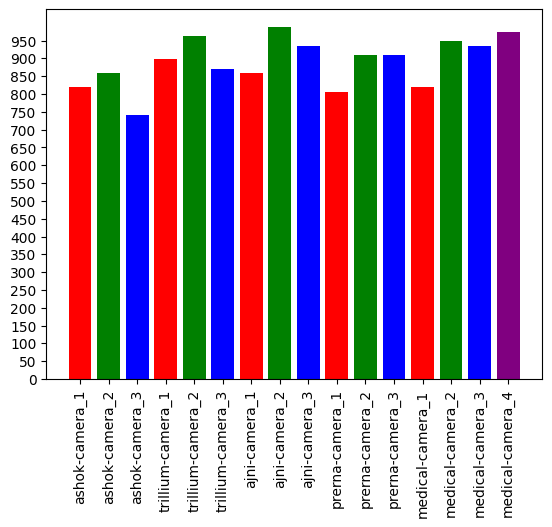

In [207]:
import matplotlib.pyplot as plt

x = []

for square_name, cameras in Outer_dict.items():
    for camera in cameras.keys():
        x.append(f'{square_name}-{camera}')


# x = list(Outer_dict.keys())
y = []

for square_name, cameras in Outer_dict.items():
    for counts in cameras.values():
        y.append(counts)

print(y)

colors = []
for square_name, cameras in Outer_dict.items():
    for camera in cameras.keys():
        if 'camera_1' in camera:
            colors.append('red')
        elif 'camera_2' in camera:
            colors.append('green')
        elif 'camera_3' in camera:
            colors.append('blue')
        elif 'camera_4' in camera:
            colors.append('purple')

plt.bar(x, y, color=colors)
plt.xticks(rotation=90)

# Specify the number of tick marks on the y-axis
plt.yticks(list(range(0, max(y) + 1,50)), rotation = 0)

plt.show()